# Training an AutoEncoder with the MNIST dataset

In [1]:
"""
author: @cesarasa

Checking the behavior of an autoencoder with the MNIST dataset. 

The autoencoder will be done with a Convolutional Neural Network (CNN) and the
dataset will be loaded using the torchvision library.
"""

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets
from torchvision import transforms

from torch.utils.data import DataLoader, SubsetRandomSampler, sampler, random_split

# Check the available devices
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
"""

"""
transform = transforms.Compose([
    transforms.ToTensor()
])
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Split train into train and validation
train_data, val_data = random_split(train_data, [50000, 10000])

# Data Loaders
batch_size = 20
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3575666.76it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 604168.05it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1991689.09it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4547750.96it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [54]:


# Define the model

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,
                               out_channels = 16,
                               kernel_size = 5, 
                               padding = 2)
        self.conv2 = nn.Conv2d(in_channels =16,
                               out_channels = 16,
                               kernel_size = 5,
                               padding=2)
        self.conv3 = nn.Conv2d(in_channels = 16,
                                out_channels = 16,
                                kernel_size = 5,
                                padding=2)
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = x.view(-1, 16*3*3)
        return x
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.t_conv1 = nn.ConvTranspose2d(in_channels = 16,
                                            out_channels = 16,
                                            kernel_size = 5,
                                            stride = 2,
                                            padding = 1)
        self.t_conv2 = nn.ConvTranspose2d(in_channels = 16,
                                            out_channels = 16,
                                            kernel_size = 3,
                                            stride = 2,
                                            padding = 1,
                                            output_padding = 1)
        self.t_conv3 = nn.ConvTranspose2d(in_channels = 16,
                                            out_channels = 1,
                                            kernel_size = 3,
                                            stride = 2,
                                            padding = 1,
                                            output_padding = 1)
        
    def forward(self, x):
        x = x.view(-1, 16, 3, 3)
        x = self.t_conv1(x)
        x = self.t_conv2(x)
        x = self.t_conv3(x)

        return x
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Check a forward pass
model = Autoencoder()
model.to(device)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
n_epochs = 100
train_losses = []
val_losses = []
for epoch in range(n_epochs):
    train_loss = 0.0
    val_loss = 0.0
    for data in train_loader:
        images, _ = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    with torch.no_grad():
        for data in val_loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            val_loss += loss.item() * images.size(0)
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}/{n_epochs} -> Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

Epoch 1/100 -> Train Loss: 0.396047, Val Loss: 0.246108
Epoch 2/100 -> Train Loss: 0.206389, Val Loss: 0.183332
Epoch 3/100 -> Train Loss: 0.171972, Val Loss: 0.166007
Epoch 4/100 -> Train Loss: 0.160085, Val Loss: 0.157909
Epoch 5/100 -> Train Loss: 0.154406, Val Loss: 0.151930
Epoch 6/100 -> Train Loss: 0.151432, Val Loss: 0.150162
Epoch 7/100 -> Train Loss: 0.149347, Val Loss: 0.148034
Epoch 8/100 -> Train Loss: 0.147691, Val Loss: 0.146656
Epoch 9/100 -> Train Loss: 0.146467, Val Loss: 0.146463
Epoch 10/100 -> Train Loss: 0.145442, Val Loss: 0.145837
Epoch 11/100 -> Train Loss: 0.144547, Val Loss: 0.144477
Epoch 12/100 -> Train Loss: 0.143861, Val Loss: 0.144334
Epoch 13/100 -> Train Loss: 0.143255, Val Loss: 0.143822
Epoch 14/100 -> Train Loss: 0.142671, Val Loss: 0.142472
Epoch 15/100 -> Train Loss: 0.142280, Val Loss: 0.143125
Epoch 16/100 -> Train Loss: 0.141871, Val Loss: 0.141592
Epoch 17/100 -> Train Loss: 0.141505, Val Loss: 0.141494
Epoch 18/100 -> Train Loss: 0.141205, Va

h(x) -> activation function.

h(x) if you are doing regression:
h(x) = x

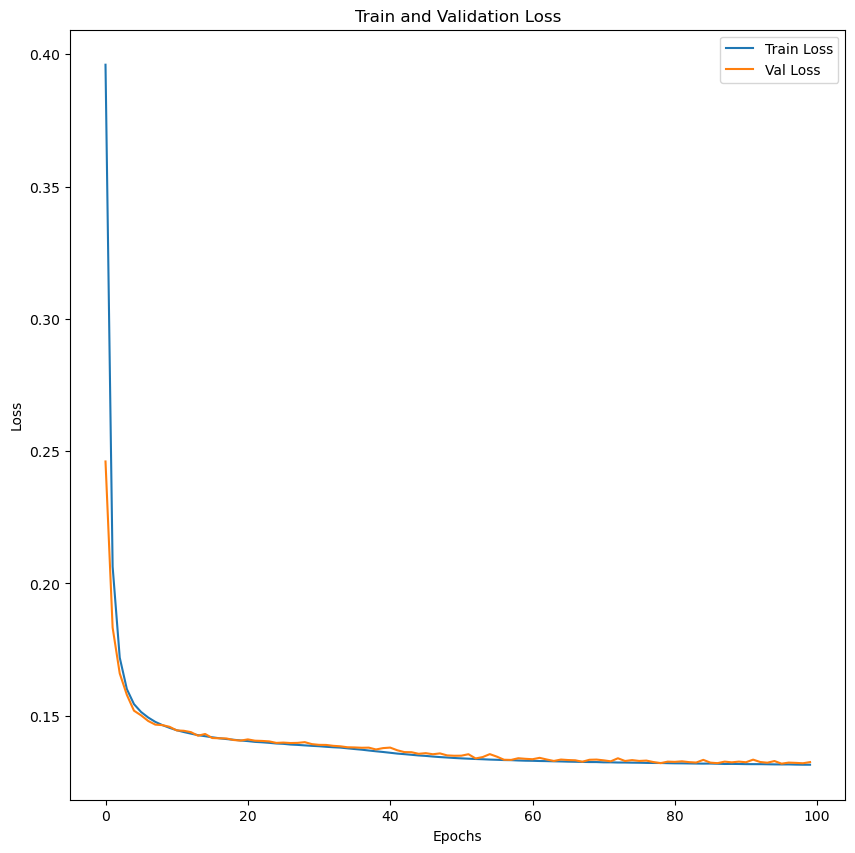

In [55]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.show()

In [50]:
# Take one batch of images
dataiter = iter(test_loader)
# Pass the batches through convolutional layer
images, labels = next(dataiter)
conv1 = nn.Conv2d(in_channels = 1,
                    out_channels = 16,
                    kernel_size = 5,
                    padding = 2) 
x = conv1(images)               # (batch_size, number_of_filters, height, width)
maxpool = nn.MaxPool2d(2, 2)
x = maxpool(x)                  # This will reduce by half the height and width (it floors the division)
conv2 = nn.Conv2d(in_channels = 16,
                    out_channels = 16,
                    kernel_size = 5,
                    padding = 2)
x = conv2(x)                    # (batch_size, number_of_filters, height, width) Preserves the output of maxpool
x = maxpool(x)                  # This will reduce by half the height and width (it floors the division)
conv3 = nn.Conv2d(in_channels = 16,
                    out_channels = 16,
                    kernel_size = 5,
                    padding = 2)
x = conv3(x)                    # (batch_size, number_of_filters, height, width) Preserves the output of maxpool
x = maxpool(x)                  # This will reduce by half the height and width (it floors the division)
x = x.view(-1, 16*3*3)          # Flatten the tensor

# # # Now we need to pass the tensor through the decoder
t_conv = nn.ConvTranspose2d(in_channels = 16,
                            out_channels = 16,
                            kernel_size = 5,
                            stride = 2,
                            padding = 1)
x = x.view(-1, 16, 3, 3)
x = t_conv(x)
t_conv2 = nn.ConvTranspose2d(in_channels = 16,
                             out_channels = 16,
                            kernel_size = 3,
                            stride = 2,
                            padding = 1,
                            output_padding = 1)
x = t_conv2(x)
t = nn.ConvTranspose2d(in_channels = 16,
                          out_channels = 1,
                          kernel_size = 3,
                          stride = 2,
                          padding = 1,
                          output_padding = 1)
x = t(x)
x.shape

torch.Size([20, 1, 28, 28])

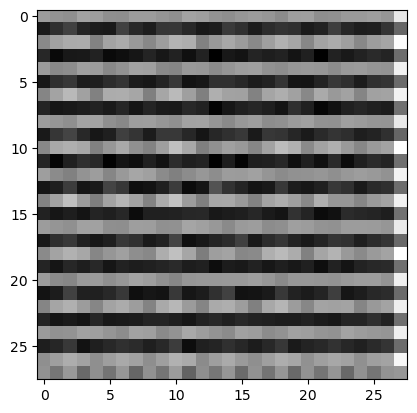

In [56]:
plt.imshow(x[0].reshape(28,28).cpu().detach().numpy(), cmap='gray')

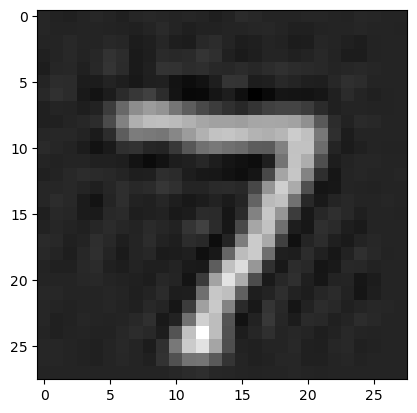

In [59]:
# Take one batch of images
dataiter = iter(test_loader)
# Pass the batches through convolutional layer
images, labels = next(dataiter)
# Pass through model 1 image
image = images[0].to(device)
output = model(image.unsqueeze(0))
output = output.cpu().detach()
output = output.view(28,28)
plt.imshow(output, cmap='gray')


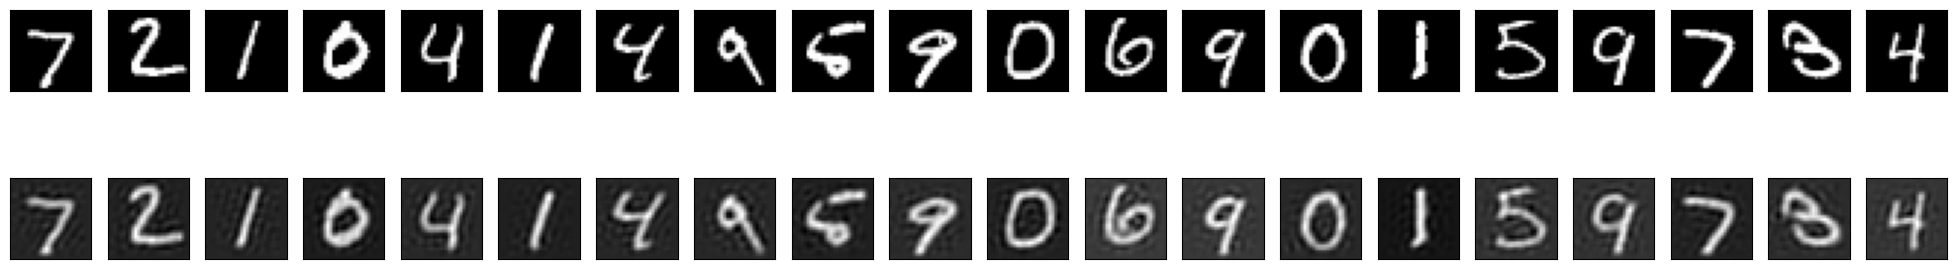

In [60]:
# Check the first batch of the test data and plot the original and the reconstructed images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
outputs = model(images)

images = images.cpu().numpy()
outputs = outputs.detach().cpu().numpy()

fig, axes = plt.subplots(nrows=2, ncols=batch_size, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, outputs], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
plt.show()


In [67]:
# We need to pass all the images through the encoder to get the latent space representation
encoded_images = []
with torch.no_grad():
    for data in test_loader:
        images, _ = data
        images = images.to(device)
        encoded = model.encoder(images)
        encoded_images.append(encoded)
encoded_images = torch.cat(encoded_images, dim=0)


In [69]:
encoded_images.shape

torch.Size([10000, 576])